# The interplay between noise and chaos

## What is noise?

**Noise** refers to the inescapable, random variation of observed variables. This happens due to the quantized nature of certain fundamental particles like electrons or photons. For example, that means there can only be a whole number of photons passing through a filter.

To see this in a more everyday situation, imagine flipping a coin a few times in a row. Given the coin is fair, after flipping 10 coins we would expect 5 heads and 5 tails. However, because we have a small sample size and can only have a whole number of heads and tails, it would be unsurprising to observe 4 heads or even 3. Just like this, when measuring the intensity of light, we might expect 1000 photons per time interval and get anywhere from 900 to 1100.

## What is chaos?

**Chaos** happens when the properties of a system cause small differences in initial conditions to lead to drastically different situations. In the 1950s, mathematician Edward Lorenz attempted to model local weather based off computer simulations. He found that dropping a decimal point off a number could change the forecast from a sunny day to a thunderstorm. This led him to formulate the butterfly effect, noting that if a butterfly flaps their wings in China, it could cause a tornado in Texas.

## How do they affect each other?

By adjusting the photon rate, we are in a unique position to adjust the noise level of the variable.

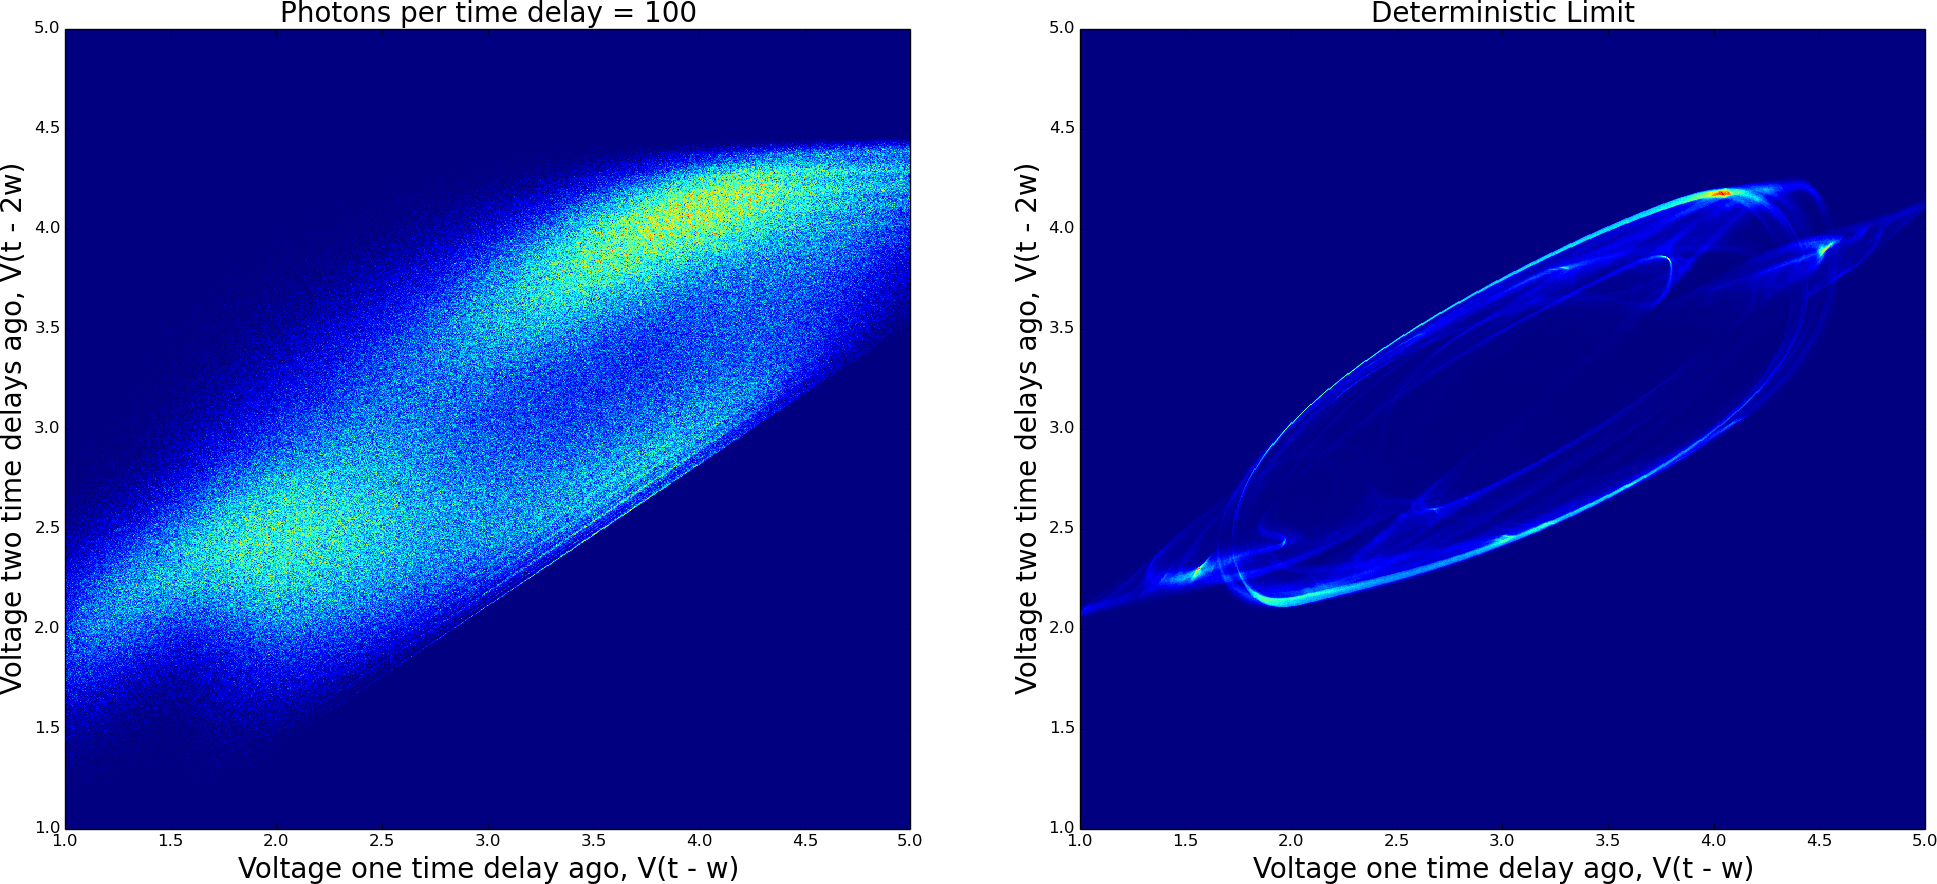

In [81]:
from ipywidgets import *
from IPython.display import Image, display
photonrates = [100,250,500,1000,2000,3200,5000,10000,20000,30000]
rate = 100

def f(x):
    rate = photonrates[x]
    display(Image(filename="data/{}.png".format(rate), height=400))
    
interact(f, x=widgets.IntSlider(min=0,max=len(photonrates) - 1 , step=1 , description = "Photon rate"));